# <center>Titulo del proyecto</center>

desarrollo rápido de lo que vamos a explicar

## Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Importamos y procesamos el dataframe

usamos la función <code>pandas.read_csv()</code> para leer un archivo csv.

In [2]:
#los datos están separados por ';' y no por ',' por lo que hay que acalarar que se separan así
data = pd.read_csv("data.csv", sep = ';')
data.head()

,Fecha,TC,Var_TC,Inflacion,IVF,EMBI,IPC,CPI,Desempleo,IMS,FED,VISTAMN,VISTAME
0,1/1/2008,"21,201","-0,0207","0,0078","120,42",253,"81,5","212,17","0,089082307","98,56","0,0394",3324947,"665827,36"
1,1/2/2008,"20,938","-0,0124","0,0091","113,98",269,"82,25","212,69","0,084756061","99,15","0,0298",3580838,"686275,22"
2,1/3/2008,"20,629","-0,0147","0,0114","107,55",298,"83,19","213,45","0,085930447","98,71","0,0261",3715312,"751467,49"
3,1/4/2008,"19,933","-0,0338","0,0033","111,1",268,"83,46","213,94","0,080425701","98,92","0,0228",3782217,"753696,48"
4,1/5/2008,"19,874","-0,0029","0,0087","114,64",233,"84,19","215,21","0,076732915","99,06","0,0198",3736839,"775795,7"


In [3]:
data.dtypes

Fecha        object
TC           object
Var_TC       object
Inflacion    object
IVF          object
EMBI          int64
 IPC         object
CPI          object
Desempleo    object
IMS          object
FED          object
 VISTAMN     object
 VISTAME     object
dtype: object

In [4]:
#Tuve problemas con los encabezados por lo que observo cual es su valor realmente

data.columns

Index(['Fecha', 'TC', 'Var_TC', 'Inflacion', 'IVF', 'EMBI', ' IPC ', 'CPI',
       'Desempleo', 'IMS', 'FED', ' VISTAMN ', ' VISTAME '],
      dtype='object')

In [5]:
#Se puede observar que algunos encabezados tienen espacios, por lo que es más dificil "citarlos" en las funciones
#Hacemos algunos cambios al respecto: IPC, VISTAMN, VISTAME

data.rename(columns = {' IPC ':'IPC', ' VISTAMN ':'VISTAMN', ' VISTAME ' : 'VISTAME' }, inplace = True)
data.columns

Index(['Fecha', 'TC', 'Var_TC', 'Inflacion', 'IVF', 'EMBI', 'IPC', 'CPI',
       'Desempleo', 'IMS', 'FED', 'VISTAMN', 'VISTAME'],
      dtype='object')

In [6]:
#object es str, y los str están separados por comas en vez de '.' como usa pandas
#Cambio comas por puntos y paso de str a float las columnas que quiero que así sean
#EMBI ya es int y no es necesario cambiarlo

data['TC']=data['TC'].str.replace(',', '.').astype(float)
data['Var_TC']=data['Var_TC'].str.replace(',', '.').astype(float)
data['Inflacion']=data['Inflacion'].str.replace(',', '.').astype(float)
data['IVF']=data['IVF'].str.replace(',', '.').astype(float)
data['IPC']=data['IPC'].str.replace(',', '.').astype(float)
data['CPI']=data['CPI'].str.replace(',', '.').astype(float)
data['Desempleo']=data['Desempleo'].str.replace(',', '.').astype(float)
data['IMS']=data['IMS'].str.replace(',', '.').astype(float)
data['FED']=data['FED'].str.replace(',', '.').astype(float)
data['VISTAMN']=data['VISTAMN'].str.replace(',', '.').astype(float)
data['VISTAME']=data['VISTAME'].str.replace(',', '.').astype(float)

#Un caso aparte: Fecha debe pasar de object a datatime
data['Fecha']= pd.to_datetime(data['Fecha'], dayfirst = True)

In [7]:
data.dtypes

Fecha        datetime64[ns]
TC                  float64
Var_TC              float64
Inflacion           float64
IVF                 float64
EMBI                  int64
IPC                 float64
CPI                 float64
Desempleo           float64
IMS                 float64
FED                 float64
VISTAMN             float64
VISTAME             float64
dtype: object

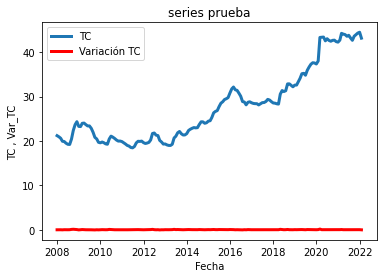

In [9]:
#plot ambas series de tiempo
plt. plot (data['Fecha'] , data['TC'] , label = 'TC', linewidth = 3 )
plt. plot (data['Fecha'] , data['Var_TC'] , color = 'r', label = 'Variación TC', linewidth = 3 )

#agregar título y etiquetas de eje
plt. title ('series prueba')
plt. xlabel ('Fecha')
plt. ylabel ('TC , Var_TC')

#add legend 
plt.legend()

#display plot
plt.show()

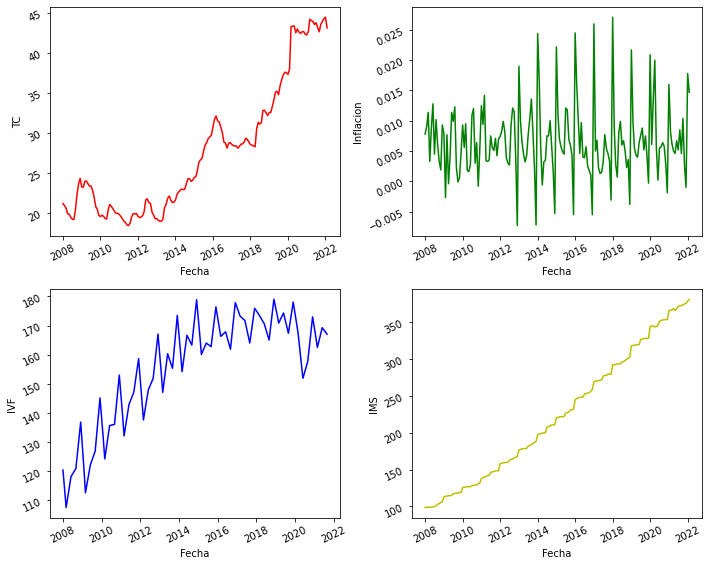

In [10]:
fig,ax =  plt.subplots( 2, 2,
                       figsize = ( 10, 8))
  
sns.lineplot( x = "Fecha", y = "TC", 
             color = 'r', data = data, 
             ax = ax[0][0])
  
ax[0][0].tick_params(labelrotation = 25)
sns.lineplot( x = "Fecha", y = "Inflacion", 
             color = 'g', data = data,
             ax = ax[0][1])
  
ax[0][1].tick_params(labelrotation = 25)
sns.lineplot(x = "Fecha", y = "IVF", 
             color = 'b', data = data,
             ax = ax[1][0])
  
ax[1][0].tick_params(labelrotation = 25)
  
sns.lineplot(x = "Fecha", y = "IMS", 
             color = 'y', data = data, 
             ax = ax[1][1])
  
ax[1][1].tick_params(labelrotation = 25)
fig.tight_layout(pad = 1.2)